<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/3/ML_Lec_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [78]:
import seaborn


#CRISP-DM

Генерация любых моделей связаных с массивной обработкой данных для целей приложения методорв машинного обучения к практическим задачам, как правило, осуществляется в рамках CRISP-DM (от английского Cross-Industry Standard Process for Data Mining). CRISP-DM — межотраслевой стандартный процесс исследования данных. Это проверенная в промышленности и наиболее распространённая методология, первая версия которой была представлена в Брюсселе в марте 1999 года, а пошаговая инструкция опубликована в 2000 году [https://ru.wikipedia.org/wiki/CRISP-DM].

CRISP-DM описывает жизненный цикл исследования данных, состоящий из 6 фаз, от постановки задачи с точки зрения бизнеса до внедрения технического решения.

Последовательность между фазами определена не строго, переходы могут повторяться от итерации к итерации. Все фазы CRISP-DM делятся на задачи, по итогам каждой должен быть достигнут конкретный результат.

Рассмотрим подробнее фазы жизненного цикла исследования данных по CRISP-DM:

**Понимание бизнеса (Business Understanding)** – определение целей проекта и требований со стороны бизнеса. Затем эти знания конвертируются в постановку задачи интеллектуального анализа данных и предварительный план достижения целей проекта. Задачи фазы Business Understanding:

  - Определить бизнес-цели
  - Оценить ситуацию
  - Определить цели анализа данных
  - Составить план проекта
 

**Начальное изучение данных (Data Understanding)** – сбор данных и знакомство с информацией, выявление проблем с качеством данных (ошибки или пропуски). Необходимо понять, какие сведения имеются, попробовать отыскать интересные наборы данных или сформировать гипотезы о наличии в них скрытых закономерностей. Задачи фазы Data Understanding:
  - Собрать исходные данные
  - Описать данные
  - Исследовать данные
  - Проверить качество данных
 

**Подготовка данных (Data Preparation)** – получение итогового набора данных, которые будут использоваться при моделировании, из исходных разнородных и разноформатных данных. Задачи фазы Data Preparation могут выполняться много раз без какого-то заранее определенного порядка:

  - Отобрать данные (таблицы, записи и атрибуты)
  - Очистить данные, в т.ч. выполнить их конвертацию и подготовку к моделированию
  - Сделать производные данные
  - Объединить данные
  - Привести данные в нужный формат
 

**Моделирование (Modeling)** – в этой фазе к данным применяются разнообразные методики моделирования, строятся модели и их параметры настраиваются на оптимальные значения. Обычно для решения любой задачи анализа данных существует несколько различных подходов. Некоторые подходы накладывают особые требования на представление данных. Таким образом часто бывает нужен возврат на шаг назад к фазе подготовки данных. Задачи фазы Modeling:

  - Выбрать методику моделирования
  - Сделать тесты для модели
  - Построить модель
  - Оценить модель
 

**Оценка (Evaluation)** – анализ количественных характеристик качества модели, подтверждение или опровержение того, что, благодаря построенной модели все бизнес-цели достигнуты. Основной целью этапа является поиск важных бизнес-задач, которым не было уделено должного внимания. Задачи фазы Evaluation:

  - Оценить результаты
  - Сделать ревью процесса
  - Определить следующие шаги
 

**Внедрение (Deployment)** – в зависимости от требований фаза развертывания может быть простой (составление финального отчета) или сложной, например, автоматизация процесса анализа данных для решения бизнес-задач. Обычно развертывание — это внедрение полученных моделей в прикладную сферу. Задачи фазы Deployment:

  - Запланировать развертывание
  - Запланировать поддержку и мониторинг развернутого решения
  - Сделать финальный отчет
  - Сделать ревью проекта


Оценка и исследование данных основной этап при подготовке любых моделей (и занимает основную часть времени 70-80% общих затрат внремени происходит на этом этапе). перечислим основные этапы :

  - 


## 1. Линейная регрессия. MSE

Линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Зависимость предсказываемой переменной от признаков будет линейной:
 
$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$
 
Параметрами моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
Обратим внимание, что сдвиг делает модель неоднородной и затрудняет ее дальнейшую оптимизацию. Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать со свободным коэффициентом, и сам $w_{0}$ будет не нужен. Тогда получим
 
$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$
 
За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

Для обучения модели необходимо иметь возможность измерять точность линейного алгоритма на выборке (обучающей или тестовой). 

В качестве меры ошибки можно взять абсолютное отклонение истинного значения от прогноза $Q(a,y)=a(x)-y$, но тогда минимизация функционала ошибки (в которой и состоит задача обучения) будет достигаться при принятии им отрицательного значения. Например, если истинное значение ответа равно $10$, а алгоритм $a(x)$ выдает ответ $11$, отклонение будет равно $1$, а при значении предсказания равном $1$, отклонение будет равно $1-10=-9$. Значение ошибки во втором случае ниже, однако разница истинного значения и предсказания нашей модели больше. Таким образом, такой функционал ошибки не поддается минимизации. 

Логичным кажется решение использовать в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, как мы далее увидим, зачастую методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле, поэтому ее оптимизация бывает затруднительной.

Поэтому сейчас основной способ измерить отклонение - посчитать квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

In [79]:
np.random.seed(1234)

In [80]:
# Возьмем 1 признак и 1000 объектов
n_features = 1
n_objects = 1000

noise = 0.1

scaleX = 1
# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))
b = 10
# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-scaleX, scaleX, (n_objects, n_features))


Y = X.dot(w_true) + np.random.normal(0, noise, size=(n_objects)) + b

w_true = np.hstack((w_true,[b]))

X = np.hstack((X,np.ones((n_objects,1))))

# возьмем нулевые начальные веса
w = np.zeros(n_features+1)

#w_true
print('w_true: ',w_true)

w_true:  [ 0.47143516 10.        ]


In [81]:
X_true = np.array([[-scaleX, 1],[scaleX,1]])
Y_true =  X_true.T.dot(w_true)

In [82]:
Y_true

array([ 9.52856484, 10.47143516])

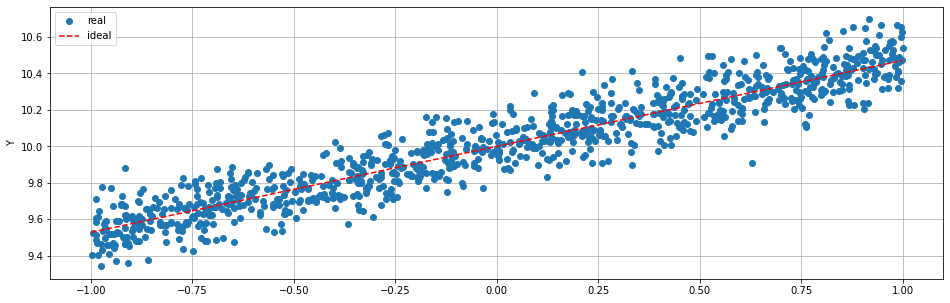

In [83]:

plt.figure(figsize = (16,5))
plt.plot(X[:,0], Y,'o', label = 'real')
plt.plot(X_true[:,0], Y_true,'r--', label = 'ideal')
plt.grid()
plt.legend()
plt.ylabel('Y')
plt.show()

In [84]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

## 2. Метод наименьших квадратов

Обучение модели регрессии заключается в минимизации функционала ошибки. Таким образом, в случае использования среднеквадратичной ошибки получаем задачу оптимизации

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Способ вычисления весов путем минимизации среднеквадратичного отклонения называется _методом наименьших квадратов_.

Заметим, что здесь мы переписали выражение функционала ошибки, заменив $a(x)$ на скалярное призведение $\left \langle w,x \right \rangle$, после чего мы уже имеем функцию, а не функционал ошибки, так как $Q$ зависит не от некоторой функции $a(x)$, а от вектора весов $w$, и оптимизировать нужно именно по нему, что гораздо проще.

Имеет смысл переписать имеющиеся соотношения в матричном виде. В матрицу "объекты-признаки" впишем по строкам $d$ признаков для всех $l$ объектов из обучающей выборки: 

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

и составим вектор ответов $y$ из истинных ответов для данной выборки:

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Помня, что $w$ - вектор параметров, переписанная в матричном виде задача будет выглядеть следующим образом:

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

где используется евклидова ($L_{2}$) норма.

Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную аналитическую формулу для решения задачи минимизации (ссылка на подробный вывод формулы есть в списке дополнительных материалов):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), а также тот факт, что матрица $X^{T}X$ может быть вырожденной и поэтому необратимой. Тогда найти решение будет невозможно.

In [85]:
def fit_LSM(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [86]:
w_lsm = fit_LSM(X[:,:n_features], Y)
w_lsm

array([ 0.47551188, 10.00124764])

In [87]:
#X1 = np.hstack((X,np.ones((X.shape[0],1))))


In [88]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

[ 0.47551188 10.00124764]
В случае использования нормального уравнения функционал ошибки составляет 0.0099


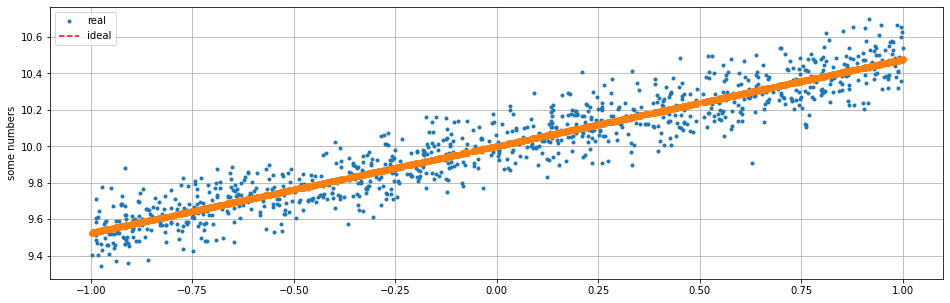

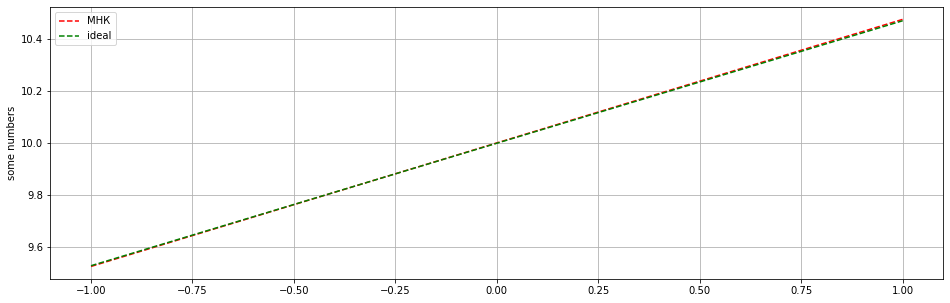

In [89]:
N = 1000
plt.figure(figsize = (16,5))
plt.plot(X[:N,:n_features], Y[:N],'.', label = 'real')
plt.plot(X_true[:,:n_features], Y_true,'r--', label = 'ideal')

plt.plot(X[:N,0],np.dot(X[:N,:],normal_eq_w),'o')
plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (16,5))

#plt.plot(X_true, Y_true,'r--', label = 'ideal')
plt.plot(X_true[:,:n_features],np.dot(X_true,normal_eq_w),'r--', label = 'МНК')
plt.plot(X_true[:,:n_features],Y_true,'g--', label = 'ideal')

plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
X_ = X.copy()
X_[:,0] = 1


In [91]:
X_[:10,:]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [92]:
normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)

[ 0.47551188 10.00124764]


In [93]:
fit_LSM(X[:,:n_features], Y)

array([ 0.47551188, 10.00124764])

Более удобным подходом будет разработка решения с помощью численных методов оптимизации, одним из которых является _градиентный спуск_.

## 3. Градиентный спуск

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$


Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки 

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Смоделируем работу градиентного спуска при помощи Numpy.

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.

Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [94]:
# список векторов весов после каждой итерации
w[:] = 1
w_list = [[0]+w.copy().tolist()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta/1 * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]#(iter_num*0.01+1)
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

(1000, 2) (2,)


In [95]:
new_w


array([ 0.475512  , 10.00124763])

In [96]:
w_array= np.array(w_list[:])
w_array.shape

(218, 3)

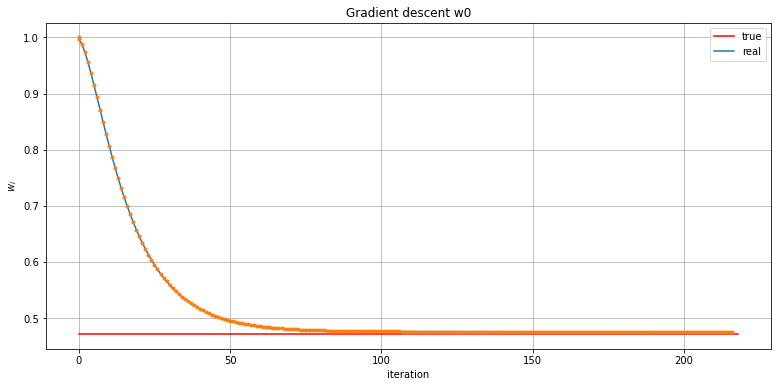

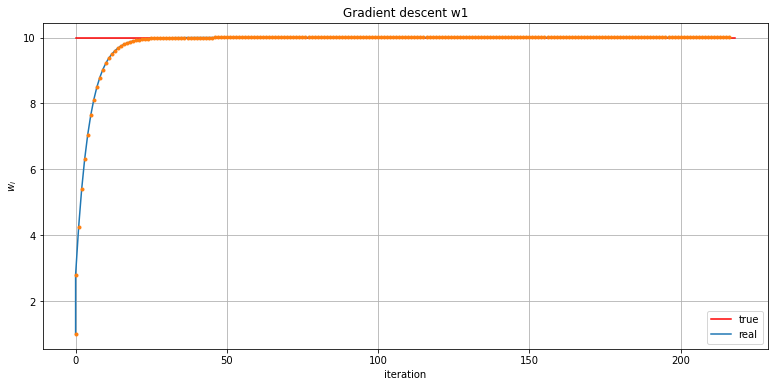

In [97]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)

for i in range(len(w_true)):
    plt.figure(figsize=(13, 6))
    plt.title('Gradient descent w'+str(i))
    plt.xlabel('iteration')
    plt.ylabel(r'$w_i$')
    
    plt.plot([0, len(w_list)], [w_true[i], w_true[i]], c='r', label = 'true')
    plt.plot(w_array[:, 0], w_array[:, i+1], label = 'real')
    plt.plot(w_array[:, 0], w_array[:, i+1],'.')
    plt.grid(True)
    plt.legend()
    plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

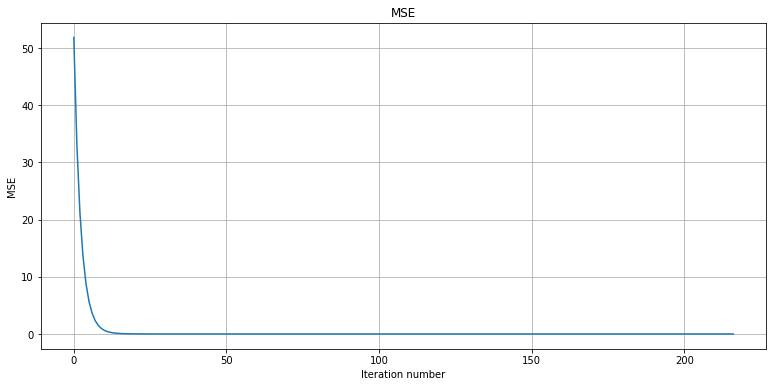

In [98]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)

plt.show()

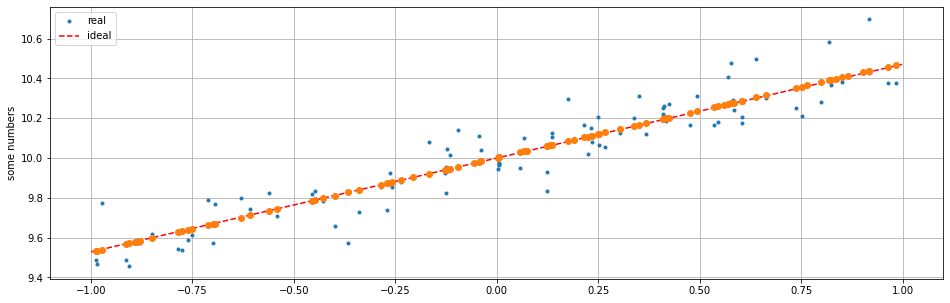

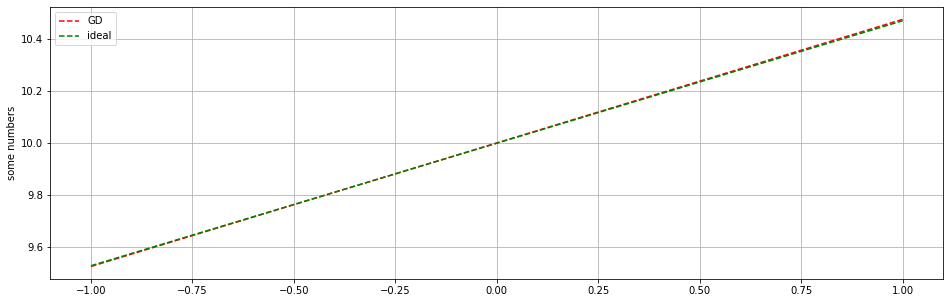

In [99]:
N = 100
plt.figure(figsize = (16,5))
plt.plot(X[:N,:n_features], Y[:N],'.', label = 'real')
plt.plot(X_true[:N,:n_features], Y_true,'r--', label = 'ideal')

plt.plot(X[:N,:n_features],np.dot(X[:N,:],new_w),'o')
plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (16,5))

#plt.plot(X_true, Y_true,'r--', label = 'ideal')
plt.plot(X_true[:,:n_features],np.dot(X_true,new_w),'r--', label = 'GD')
plt.plot(X_true[:,:n_features],Y_true,'g--', label = 'ideal')

plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

Видно, что изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

### Многомерный пример:

In [100]:
# Возьмем n признаков и 1000 объектов
n_features = 10
n_objects = 1000

noise = 1.2

scaleX = 7
# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-scaleX, scaleX, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, noise, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

#w_true
print('w_true: ',w_true)

w_true:  [-0.26278856  0.27113156 -0.24043919 -1.4621581   1.02204918  0.74933384
 -1.08976043  1.21039882  1.73042508 -0.98417623]


In [101]:
normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)



[-0.25389182  0.25974114 -0.26650118 -1.45203247  1.00600508  0.74651661
 -1.10432521  1.21189325  1.74060217 -0.98849112]


In [102]:
# список векторов весов после каждой итерации
w[:] = 0
w_list = [[0]+w.copy().tolist()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.001

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

(1000, 10) (10,)


In [103]:
w_array= np.array(w_list[:])
w_array.shape

(563, 11)

In [104]:
print('w true: \n',w_true)

w true: 
 [-0.26278856  0.27113156 -0.24043919 -1.4621581   1.02204918  0.74933384
 -1.08976043  1.21039882  1.73042508 -0.98417623]


In [105]:
print('w from GD: \n',w_list[-1,1:])
print('error from GD: \n',mserror(X, w_list[-1,1:], Y))

w from GD: 
 [-0.25389167  0.25974105 -0.26650109 -1.45203247  1.00600518  0.74651663
 -1.10432502  1.21189314  1.74060206 -0.98849099]
error from GD: 
 1.3838293947161164


In [106]:
print('w from LSM: \n',normal_eq_w) 
print('error from LSM: \n',round(mserror(X, normal_eq_w, Y), 4))

w from LSM: 
 [-0.25389182  0.25974114 -0.26650118 -1.45203247  1.00600508  0.74651661
 -1.10432521  1.21189325  1.74060217 -0.98849112]
error from LSM: 
 1.3838


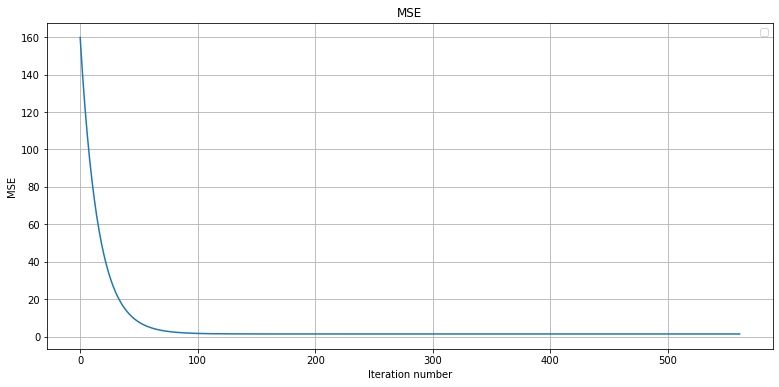

In [107]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

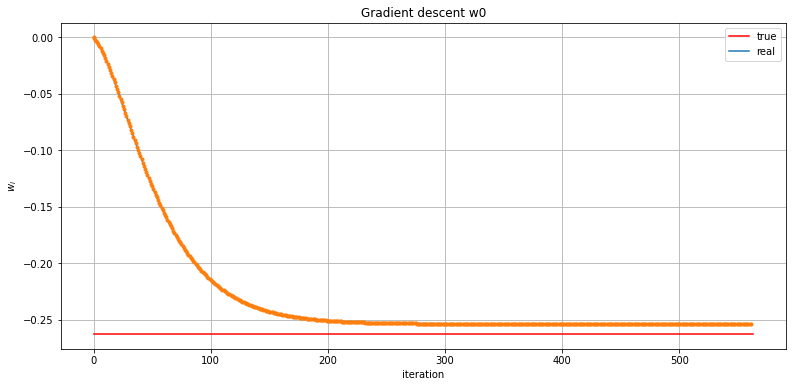

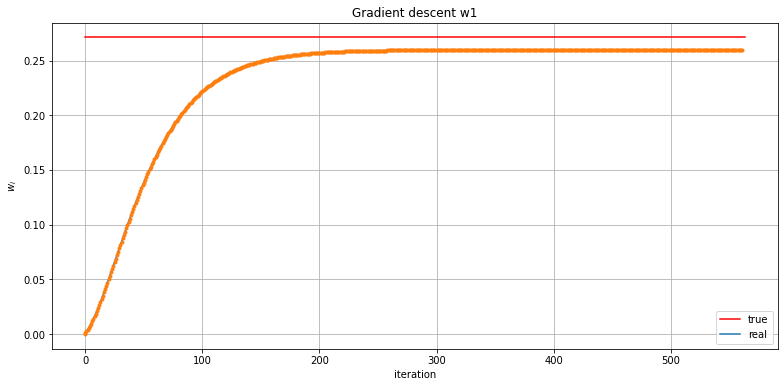

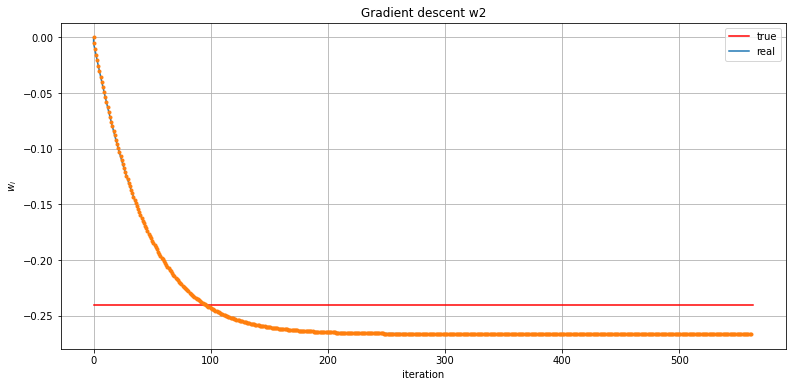

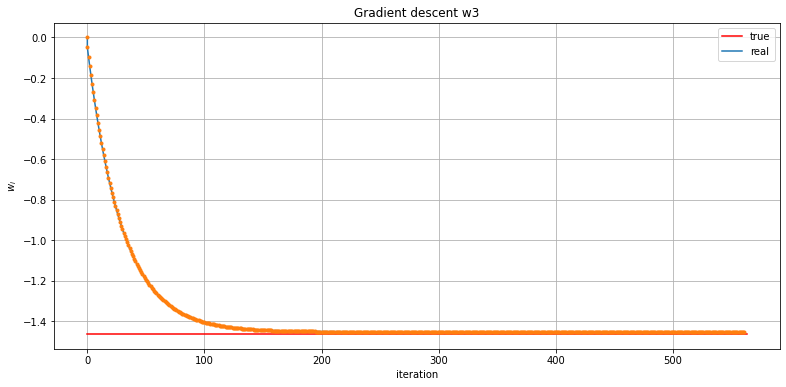

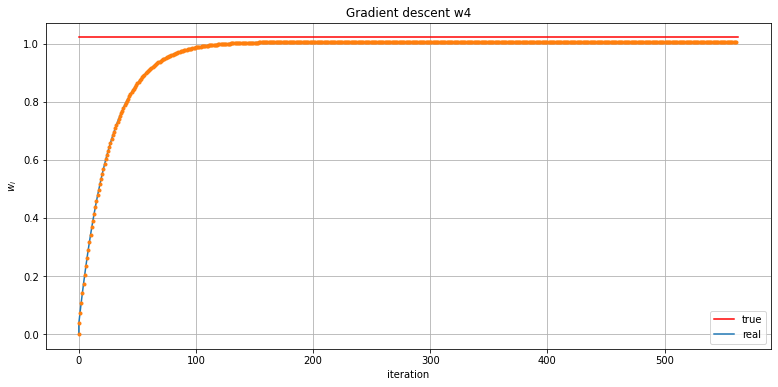

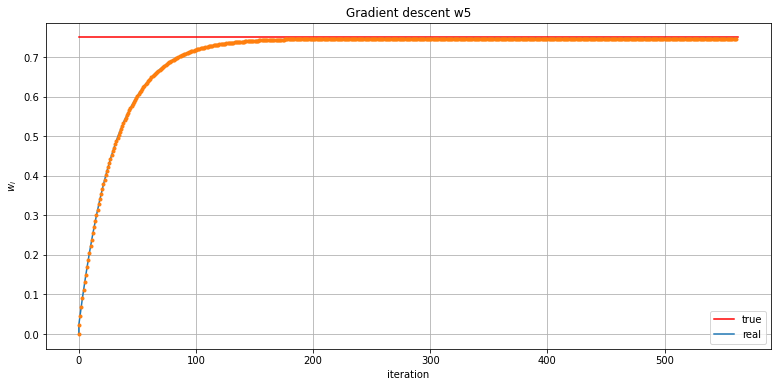

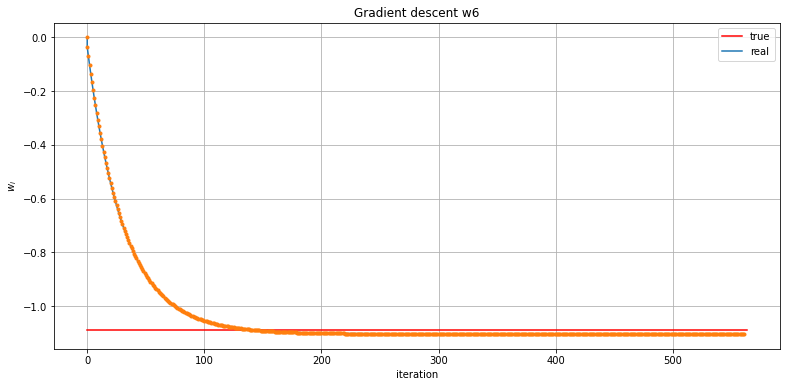

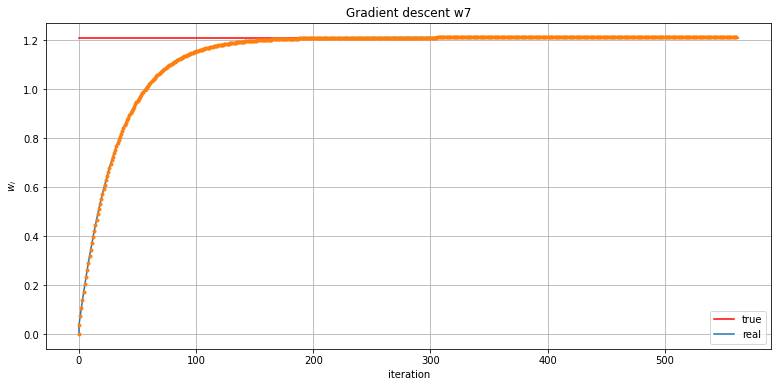

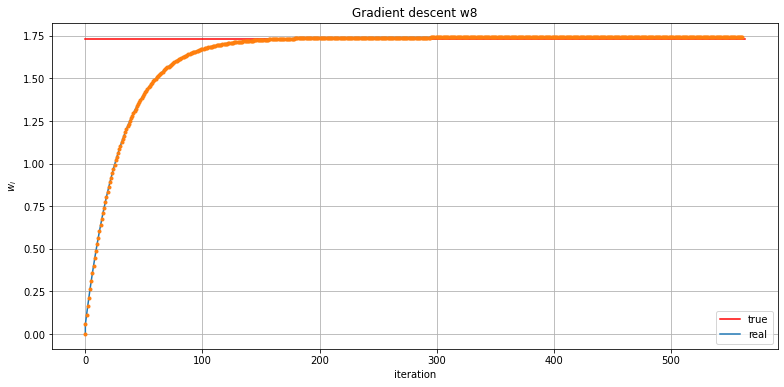

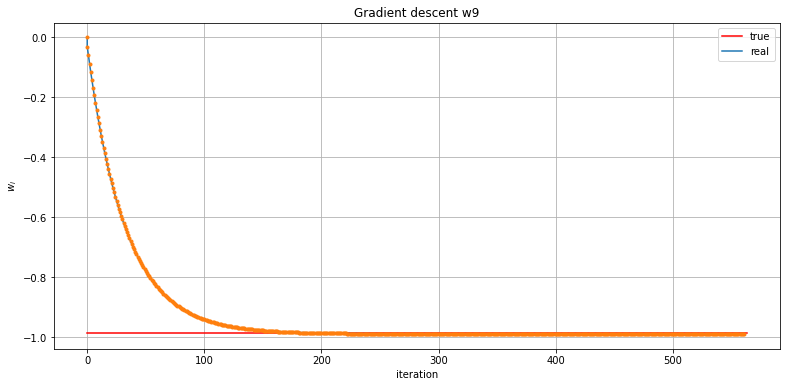

In [108]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)

for i in range(len(w_true)):
    plt.figure(figsize=(13, 6))
    plt.title('Gradient descent w'+str(i))
    plt.xlabel('iteration')
    plt.ylabel(r'$w_i$')
    
    plt.plot([0, len(w_list)], [w_true[i], w_true[i]], c='r', label = 'true')
    plt.plot(w_array[:, 0], w_array[:, i+1], label = 'real')
    plt.plot(w_array[:, 0], w_array[:, i+1],'.')
    plt.grid(True)
    plt.legend()
    plt.show()

## Линейная классификация


Линейный классификатор (бинарный, параметрический) - построение границ между группами в форме линейной функции - линейное разделение обектов


Рассмотрим задачу построения линейной разделяющей гиперповерхности. Главным достоинством линейного классификатора является его простота и вычислительная эффективность.

Рассмотрим линейную дискриминантную функцию: 

g(x)=W' x+W_0, где 

W'=(W_1,W_2,W_0)' – весовой вектор, 
W_0 – порог. 

Поведение решения задается уравнением g(x)=0. Пусть X_1 и X_2 – два конечных множества векторов признаков в евклидовом пространстве, относящихся к классу 1 и 0 соответственно, т.е X_1 принадлежит классу 1 при g(x)>0, а X_2 принадлежит классу 0 при g(x)<0.

Задача состоит в том, чтобы:

- установить разделимость этих множеств;

- найти разделяющую гиперплоскость.


Рассмотрим сначала в качестве примера двумерную задачу, когда образы представляются точками на плоскости.

*Определение*. Множество, содержащее отрезок, соединяющий две произвольные внутренние точки, называется выпуклым.

*Определение*. Выпуклая оболочка – это минимальное выпуклое множество, содержащее данное.

*Утверждение 1*. Два множества на плоскости линейно разделимы тогда и только тогда, когда их выпуклые оболочки не пересекаются.

[-0.70710678 -0.70710678]


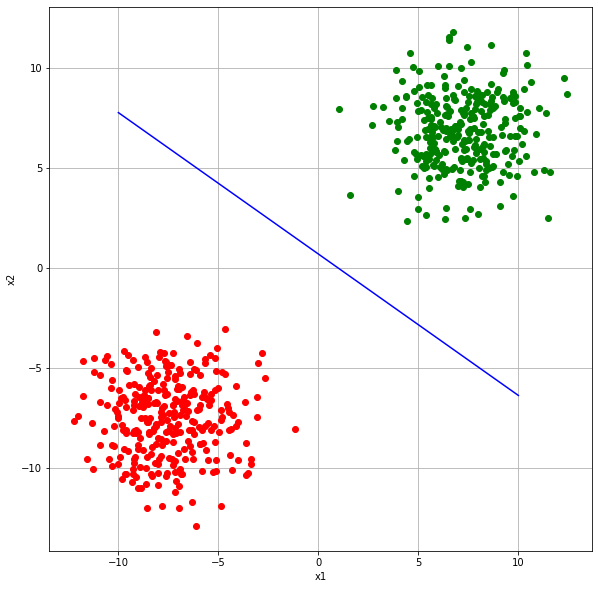

In [158]:
def line_x1(x1,w):
    return (w[1]* x1 -w[0])

N = 300 # number of samples
n = 2 # number of feature
# Gauss Mix
gD = 2
gM = 7
rD = 2
rM = -7.5
# генерируем зелёные точки
x1x2_green = np.random.randn(N, n) * gD + gM

# генерируем красные точки
x1x2_red = np.random.randn(N, n) * rD + rM

# all in set
x1x2 = np.concatenate((x1x2_green, x1x2_red))

# проставляем классы: зелёные +1, красные -1
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

# рисуем точки
plt.figure(figsize = (10,10))
plt.plot(x1x2_red[:,0],x1x2_red[:,1], 'ro')
plt.plot(x1x2_green[:,0],x1x2_green[:,1], 'go')        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем границу
x1_range = np.array([-10.0, 10.0])
w = (np.array([rM,rM])+np.array([gM,gM]))
w = w/np.sqrt(np.sum(w ** 2))
print(w)

plt.plot(x1_range, line_x1(x1_range,w), color='blue')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

plt.show()

In [110]:
w

array([-0.70710678, -0.70710678])

Наивное решение : найти плоскость перпендикулярную линии между центрами множеств - вектор нормали этой плоскости                    

w = (red,green)
    
Однако положение центров групп "Красные" и "Зеленые" не известно.

Ищем вектор w через обучение.

Выбираем семейство функций F(X,W).

Общий риск R:

- Функция стоимости
- Неизвестное распределение 
- Общая оценка потерь для некоторой модели

эмпирический риск Remp:

- аппроксимация общего риска

Метод минимизации эмпирического риска:

 - Выбрать семейство функций F(X,W)
 - Двигать параметры W в min Remp




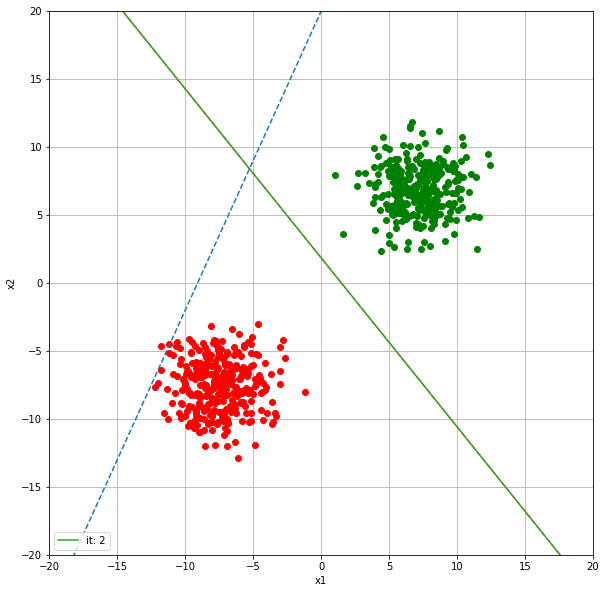

In [159]:
indices = np.array(range(x1x2.shape[0]))
# перемешаем
np.random.shuffle(indices)

x1x2 = x1x2[indices]
labels = labels[indices]

# случайные начальные веса
w1 = -1.1
w2 = 0.5
b = -10
w=[b,w1,w2]
# разделяющая гиперплоскость (граница решений)
def g_line(x1, x2):
    return w[1 ]* x1 + w[2] * x2 + w[0]

# ниже границы -1
# выше +1
def class_label(value):
    return -1 if value < 0 else 1

# добавляем начальное разбиение в список
lines = [[w1, w2, b]]

plt.figure(figsize = (10,10))

for max_i in range(100):
    # счётчик ошибок для ранней остановки
    error_count = 0
    
    # по всем примерам
    for i, (x1, x2) in enumerate(x1x2):
        # вычисляем расстояние до гиперплоскости
        value = g_line(x1, x2)
        
        # проверяем метку из разметки  (-1, +1)
        true_label = int(labels[i])
        
        # проверяем предсказание метки по value (-1, +1)
        pred_label = class_label(value)
        
        # делаем корректировку если ошибка (идем к )
        if (true_label != pred_label):
            # корректируем веса в сторону верного класса, т.е.
            # идём по нормали — (x1, x2) — в случае класса +1
            # или против нормали — (-x1, -x2) — в случае класса -1
            # т.к. нормаль всегда указывает в сторону +1
            w1 = w1 + x1 * true_label
            w2 = w2 + x2 * true_label
            
            # смещение корректируется по схожему принципу
            b = b + true_label
            w = [b,w1,w2]
            
            # считаем количество неверно классифицированных примеров
            error_count = error_count + 1
    
    # если была хотя бы одна коррекция
    if (error_count > 0):
        # запоминаем границу решений
        lines.append([w1, w2, b])
    else:
        # иначе — ранняя остановка
        break

# рисуем точки (по последней границе решений)
for i, (x1, x2) in enumerate(x1x2):
    y_pred_label = class_label(g_line(x1, x2))

    if (y_pred_label < 0):
        plt.plot(x1, x2, 'ro', color='red')
    else:
        plt.plot(x1, x2, 'ro', color='green')

# выставляем равное пиксельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')    

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# диапазон для визуализации границы решений
x1_ = np.arange(-30, 50, 0.1)

#  границу решений в точках 
# x2 = f(x1) = -(w1 * x1 + b) / w2
def plot_line(w1, w2, b):
    def g_plot_line(x1):
        return -(w1 * x1 + b) / w2
    
    return g_plot_line

# итерации по изменению границы 
it = 0
for coeff in lines:
    r_line = plot_line(coeff[0], coeff[1], coeff[2])
    
    plt.plot(x1_, r_line(x1_), linestyle='dashed')
    
    it = it + 1
plt.plot(x1_, r_line(x1_), linestyle='solid',label = 'it: ' + str(it))    
# 
plt.axis([-20, 20, -20, 20])
    
# 
plt.legend(loc = 'lower left')
  
# 
plt.grid()
plt.show()

Как и в случае регрессии, в классификации можно использовать линейные модели. Это называется _линейной классификацией._ Линейные классификаторы устроены похожим на линейную регрессию образом, за одним лишь различием - для получения бинарных значений берется только знак от значения $a(x)$:

$$a(x) = \text{sign}\left (w_{0}+\sum^{d}_{i=1}w_{i}x^{i} \right ).$$

Аналогично линейной регрессии, после добавления константного признака формула имеет вид

$$\text{sign} \left ( \sum^{d+1}_{i=1}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек $\left \langle w,x \right \rangle = 0$ образует _гиперплоскость_ в пространстве признаков и делит его на две части. Объекты, расположенние по разные стороны от нее, относятся к разным классам.

Стоит отметить, что для некоторого объекта $x$ расстояние до этой гиперплоскости будет равняться $\frac{| \left \langle w,x \right \rangle |}{||w||}$, соответственно, при классификации нам важен не только знак скалярного произведения $\left \langle w,x \right \rangle$, но и его значение: чем выше оно, тем больше будет расстояние от объекта до разделяющей гиперплоскости, что будет означать, что алгоритм более уверен в отнесении объекта к данному классу. Это приводит нас к значению _отступа_, который равен скалярному произведению вектора весов $w$ на вектор признаков $x$, умноженному на истинное значение ответа $y$, которое, как мы помним, принимает значения -1 и 1:

$$M_{i}=y_{i}\left \langle w,x_{i} \right \rangle.$$

Таким образом, если скалярное произведение отрицательно, и истинный ответ равен -1, отступ будет больше нуля. Если скалярное произведение положительно, и истинный ответ равен 1, отступ также будет положителен. То есть $M_{i}>0$, когда классификатор дает верный ответ, и $M_{i}<0$, когда классификатор ошибается. Отступ характеризует корректность ответа, а его абсолютное значение свидетельствует о расстоянии от разделяющей гиперплоскости, то есть о мере уверенности в ответе.

### Функционал ошибки в линейной классификации

Как и в случае линейно регрессии, для обучения алгоритма линейной классификации требуется измерять ошибку. По аналогии с средней абсолютной ошибкой и среднеквадратичной ошибкой в случае линейной классификации можно использовать естественный подход: так как возможных ответов конечное число, можно требовать полного совпадения предсказанного класса $a(x_{i})$ и истинного $y_{i}$. Тогда в качестве функционала ошибки можно использовать долю неправильных ответов:

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[a(x_{i}) \neq y_{i}]$$

или, используя понятие отступа,

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[M_{i}<0] = \frac{1}{l}\sum^{l}_{i=1}[y_{i}\left \langle w,x_{i} \right \rangle < 0].$$

Функция, стоящая под знаком суммы, называется _функцией потерь_. График ее в зависимости от отступа будет иметь пороговый вид:

In [112]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [113]:
def loss_function(x):
    return 0 if x > 0 else 1

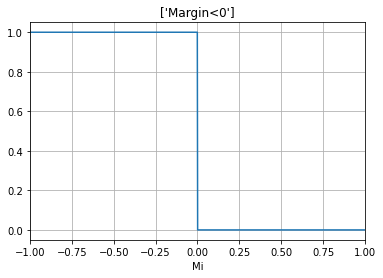

In [114]:
dots = np.linspace(-1, 1, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, q_zero_one_loss)
plt.grid(True)
plt.title(['Margin<0'])
plt.show()

Она называется _пороговой функцией потерь_ или 1/0 функцией потерь. Как мы видим, она негладкая, поэтому градинентные методы оптимизации к ней неприменимы. Для упрощения оптимизации используют гладкие оценки сверху этой функции, то есть такие функции, что 

$$[M_{i}<0] \leq \tilde{L}(M_{i}).$$

Тогда минимизировать уже нужно эту новую функцию:

$$Q(a, X) \leq \tilde Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}\tilde{L}(M_{i}) \rightarrow \underset{w}{\text{min}}.$$

Примерами могут быть:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$


- _квадратичная функция потерь_ $\tilde{L}(M_{i}) = (1- (M_{i}))^{2}$


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}_{2}(1 + \text{exp}(- M_{i}))$


- и др. (см. доп. материалы)

Реализуем их и построим соответствующие графики.

## Функции стоимости

Аппроксимация функции стоимости L(y!=y_true) в непрерывной форме для формирования оценки параметров w. 

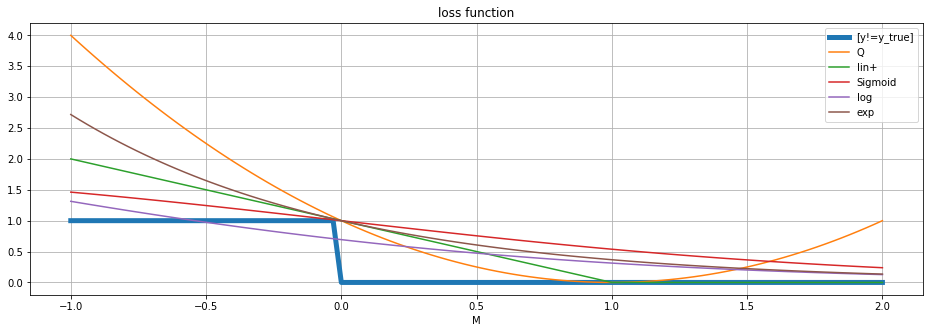

In [115]:
M= np.linspace(-1,2,100)

P=(M<0).astype(int)
Q=(1-M)**2
Li=(1-M)
Li[np.where(Li<0)[0]]=0

S=2*(1+np.exp(M)) ** (-1)

Lo = np.log(1+np.exp(-M))
E= np.exp(-M)
plt.figure(figsize=(16,5))
plt.plot(M,P, label='[y!=y_true]',linewidth=5)
plt.plot(M,Q, label='Q')
plt.plot(M,Li, label='lin+')
plt.plot(M,S, label='Sigmoid')
plt.plot(M,Lo, label='log')
plt.plot(M,E, label='exp')
plt.title('loss function')
plt.xlabel('M')
plt.grid()
plt.legend()
plt.show()

Отступы :

вычисляем g(x)=W' x+W_0


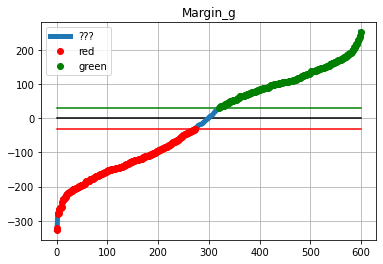

In [116]:
w = [b, w1,w2]
Margin_g=np.sort((np.dot(x1x2,np.array(w[1:]).reshape((2,1)))+w[0])[:,0])

dM = 30
plt.plot([0,Margin_g.shape[0]],[0, 0 ],'k')
plt.plot([0,Margin_g.shape[0]],[-dM, -dM ],'r')
plt.plot([0,Margin_g.shape[0]],[dM, dM ],'g')

plt.plot(Margin_g,label='???',linewidth=5)
Mred=np.where(Margin_g<-dM)[0]
plt.plot(Mred,Margin_g[Mred],'or',label ='red')
Mred=np.where(Margin_g>dM)[0]
plt.plot(Mred,Margin_g[Mred],'og',label='green')

plt.title('Margin_g')
plt.grid()
plt.legend()
plt.show()

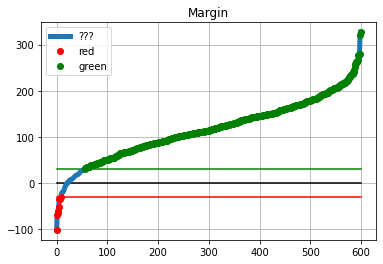

In [117]:
Margin=np.sort(labels*(np.dot(x1x2,np.array(w[1:]).reshape((2,1)))+w[0])[:,0])

dM = 30
plt.plot([0,Margin.shape[0]],[0, 0 ],'k')
plt.plot([0,Margin.shape[0]],[-dM, -dM ],'r')
plt.plot([0,Margin.shape[0]],[dM, dM ],'g')

plt.plot(Margin,label='???',linewidth=5)
Mred=np.where(Margin<-dM)[0]
plt.plot(Mred,Margin[Mred],'or',label ='red')
Mred=np.where(Margin>dM)[0]
plt.plot(Mred,Margin[Mred],'og',label='green')

plt.title('Margin')
plt.grid()
plt.legend()
plt.show()

Все они оценивают функцию потерь сверху и при этом хорошо оптимизируются.

## Логистическая регрессия

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.

Во многих задачах такая особенность является очень важной. Например, в задачах кредитного скоринга (предсказание, вернет клиент кредит или нет) прогнозируют вероятность невозврата кредита и на основании нее принимают решение о выдаче или невыдаче.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

Изобразим ее типичный график.

In [118]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

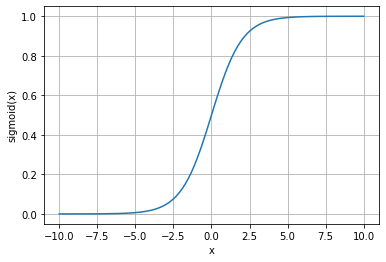

In [119]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value)
plt.show()

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

Чтобы понять, как его интерпретировать, выведем его из формулы выше:

$$\left \langle w,x_{i} \right \rangle = \text{ln} \frac{p_{+}}{1 - p_{+}}.$$

Таким образом, скалярное произведение вектора весов на вектор признаков представляет собой логарифм отношения вероятностей того, что y = 1 к вероятности того, что y = -1. Выражение под логарифмом называется _риском_, а вместе с логарифмом это выражение называется _логитом_. Поэтому метод и называется логистической регрессией: мы приближаем логит линейной комбинацией признаков и весов.

Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_ (см. доп. материалы). Его сущность заколючается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Исходя из этого, правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма) будет равняться произведению вероятностей получения каждого имеющегося ответа:

$$P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Правдоподобие можно использовать как функционал для обучения алгоритма, однако, удобнее взять от него логарифм, так как в этом случае произведение превратится в сумму, а сумму гораздо проще оптимизировать. Также, в отличие от рассмотренных ранее функций потерь, правдоподобие требуется максимизировать для обучения алгоритма, а не минимизировать. Поэтому для большего удобства перед правдоподобием ставят минус, поскольку функции потери в задачах регрессии принято минимизировать. В итоге получим:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$

Данная функция потерь называется _логарифмической функцией потерь (log loss)_ или _кросс-энтропией_.

Если мы подставим в нее полученное ранее выражение для $p_{+}$ для сигмоиды, получим:

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}) + [y_{i} = -1]\text{ln}(1 - \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}))) =$$

$$=-\sum^{l}_{i=1} \text{ln}(1 + exp(\left \langle w,x_{i} \right \rangle))$$

В случае, когда имеются классы 1 и -1.


То есть в случае логистической регрессии обучение сводится к минимизации этого функционала. Обратите внимание, что мы получили функцию, аналогичную показанной ранее логистической функции потерь, с точность до коэффициента $\frac{1}{ln(2)}$, так как выражение в скобках как раз представляет собой отступ $M_{i}$.

В случае, когда $y$ принимает значения 0 и 1, log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} \frac{exp(-\left \langle w,x_{i} \right \rangle)}{1 + exp(-\left \langle w,x_{i} \right \rangle)}).$$

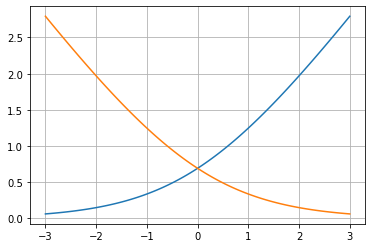

In [120]:
x = np.linspace(-3,3,100)
w = 0.91

plt.plot(x,-np.log(1/(1+np.exp(x *w))))
plt.plot(x,-np.log((1-1/(1+np.exp(x * w)))))
plt.grid()
plt.show()

### Реализация логистической регрессии

Напишем алгоритм логистической регрессии.

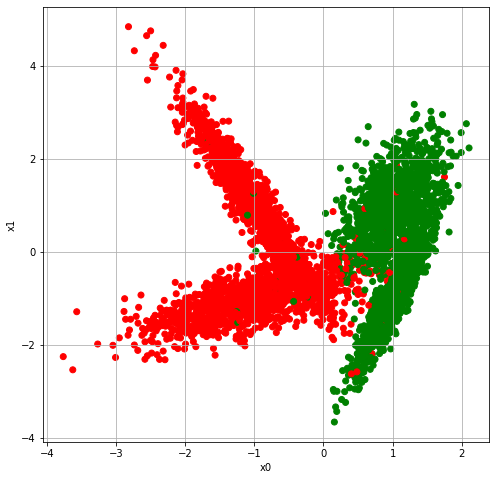

In [121]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
# 

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Далее разделим выборку на обучающую и тестовую. При реальной работе, если нет специфических требований по сохранению порядка выборки, ее полезно перемешивать, так как данные в ней могут быть каким-либо образом отсортированы. Это может негативно сказаться на процессе обучения.

In [122]:
# перемешивание датасета
np.random.seed(120)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index,:], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.9
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (4500, 2)
Размер массива признаков тестовой выборки (500, 2)
Размер массива ответов для обучающей выборки (4500,)
Размер массива ответов для тестовой выборки (500,)


In [123]:
 y_test[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

Далее транспонируем матрицы данных, так как нам удобнее работать со строками

In [124]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X(A-Y)^{T},$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

In [125]:
def log_loss(w, X, y):
    m = X.shape[1]
    

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

Реализуем градиентный спуск

In [126]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    X = np.vstack((np.ones((1,X.shape[1])),X))
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

и функцию для выполнения предсказаний

In [127]:
def predict(w, X):
    
    m = X.shape[1]
    X = np.vstack((np.ones((1,X.shape[1])),X))
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [128]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0]+1, 1))+0.1
n_iterations = 500
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-0.21638412]
 [ 2.86347759]
 [ 0.09292863]]
Точность на обучающей выборке: 96.956
Точность на тестовой выборке: 96.200


Покажем, как менялась при этом функция потерь.

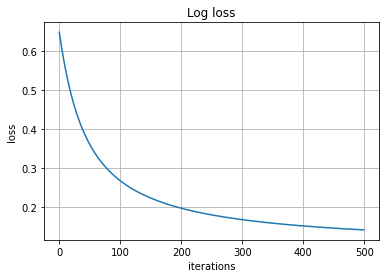

In [129]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')

plt.plot(range(len(losses)), losses)
plt.grid()
plt.show()

In [130]:

xl = np.array([[1,1],[-2,2],[-2,2]]) * 0.9

yt = np.dot(w.T, xl)


In [131]:
yt

array([[-5.51627689,  5.12678548]])

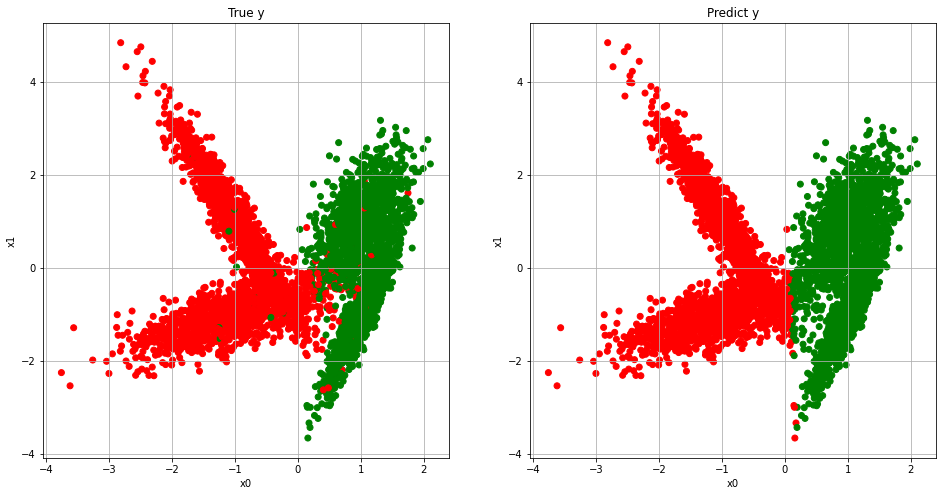

In [132]:
colors = ListedColormap(['red', 'blue','green'])
y_x = predict(w, classes[0].T)
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.title('True y')
plt.xlabel('x0')
plt.ylabel('x1')
plt.subplot(1,2,2)
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=y_x.reshape(-1), cmap=colors)
plt.grid()
plt.title('Predict y')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Наборы данных

Для хранения наборов данных scikit learn  :
  - использует массивы в формате numpy.array ( из библиотеки NymPy) 
  - использует разреженные матрицы в формате scipy.sparse (из библиотеки SciPy)
  - поддерживает формат хранения DataFrame из библиотеки Pandas
  - имеет функции, позволяющие считывать данные из внешних файлов в форматах txt, csv, json и так далее.
  - использует наборы данных, которые поставляются вместе с библиотекой. Это открытые общеизвестные данные:
      - **данные о стоимости жилья в Бостоне**: исходя из количества комнат и уровня преступности в городе, модель может вычислять цены на жилье;
      - **данные о результатах диагностики рака молочных желез** из города Висконсина: используются для выявления злокачественного или доброкачественного новообразования;
      - **датасет химических свойств вин**: исходя из этих свойств модель может определить тип вина.


### **Задание 1.** Линейные модели в пакете scikit learn.

  1.1. Загрузить набор **стоимость жилья в Бостоне**.







In [160]:
from sklearn.datasets import load_boston
import sklearn.datasets as datasets 

V = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [161]:
x = V[0]
y = V[1]
x.shape, y.shape  # x - описание объектов, у - стоимость объектов

((506, 13), (506,))

1.2. Вывести таблицу с описанием данных и определить характер целевого свойства и оценить полноту данных

1.3. Постоить гистограмму стоимости 

1.4. построить гистограммы для признаков

1.5. Сделать визуальную оценку характера распределения

1.6. Оценить характер распределения опираясь на тесты нормальности 

1.7. Определить основной набор статистик для х и у

1.8. Оцените факт наличия/отсутствия выбросов и охарактеризуйте качество данных (резюме предществующих пунктов )


In [162]:
#1.2
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [163]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


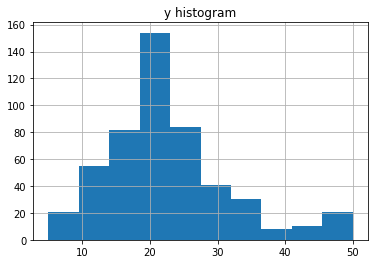

In [164]:
#1.3
plt.hist(y)
plt.grid()
plt.title('y histogram')
plt.show()

У данных "странный" хвост

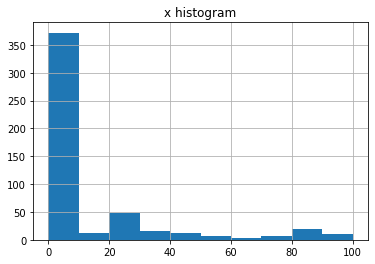

In [165]:
#1.4
plt.hist(x[:,1])
plt.grid()
plt.title('x histogram')
plt.show()

НЕ похоже на нормальные

1.5.  ...

Тесты в Python: https://machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/

Учебник : стат.гипотезы
https://drive.google.com/file/d/1dcuX7c9FEbjXW3Z6ZOpR6gjaemG9KXVb/view?usp=sharing


У нас 2 гипотезы:
- "нулевая" (H0) - наблюдаемые выборки нормальны
- "альтернативная" (H1) - не нормальны


**Методика проверки статистических гипотез**

1. Cформулировать гипотезы $\normalsize H_0$ и $\normalsize H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки(ок) и т.д.
3. Зафиксировать уровень значимости $\normalsize \alpha$
4. Рассчитать значение статистики $\normalsize T$ и достигаемые уровень значимости $\normalsize p-value^* = P(T \ge t \: | \: H_0)$
5. Если $\normalsize p-value < \alpha$, $\normalsize H_0$ отвергается в пользу $\normalsize H_1$, т.к вероятность получить такие данные (выборку), при верности $\normalsize H_0$, крайне мала.

*достигаемый уровень значимости, p-value* - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или ещё более экстремальное.


**Ошибки первого и второго рода**

Ошибка первого рода — когда нулевая гипотеза отвергается, хотя на самом деле она верна.<br>
Ошибка второго рода — когда нулевая гипотеза принимается, хотя на самом деле она не верна.<br>

|$H_0$             |**верная**                                    |**ложная**                                 |
|:----------------:|:--------------------------------------------:|:-----------------------------------------:|
|**принимается**   |$H_0$ верно принята                           |$H_0$ неверно принята (ошибка второго рода)|
|**отклоняется**   |$H_0$ неверно отвергнута (ошибка первого рода)|$H_0$ верно отвергнута                     |

В механизме проверки гипотез ошибки первого и второго рода неравнозначны, ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\normalsize \alpha$,<br>
$\normalsize P(H_0 \: отвергнута \: | \: H_0) = P (p \le \alpha \: | \: H_0) \le \alpha$

Ошибка второго рода связана с понятием мощности статистического критерия,<br>
$\normalsize pow = P(H_0 \: отвергнута \: | \: H_1) = 1 - P(H_0 \: принята \: | \: H_1)$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.



In [167]:
# 1.6 тест нормальности

# N> 5000 статистика теста W является точной, но значение p может быть неточным. 
#
stat, p = stats.shapiro(y)
p

4.940195786292171e-16

In [211]:
# 1.6 тест нормальности
# H0 - Gausse distr.
n = 1

stat, p = stats.shapiro(x[:,n])
p

7.882576753156324e-34

In [212]:
# 1.6 тест нормальности
# H0 - Gausse distr.
#  комплексн. теста нормальности
stat, p = stats.normaltest(x[:,n])
p

2.702371210664229e-50

In [213]:
# H0 - Gausse distr.
#  комплексн. теста нормальности
stat, p, level  = stats.anderson(x[:,n], dist = 'norm')
stat, p, level

(98.18234422170497,
 array([0.572, 0.651, 0.781, 0.911, 1.084]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [168]:
# 1.7.

pd.DataFrame(y).describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [169]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


1.8. Оценка набора данных:

- 

1.9. Строим регрессию 

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.3 - пропорция разбиения (доля тестов)
X_train, X_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.3, random_state=17)



Обучаем модель на тренировочном наборе:

In [174]:
lr = LinearRegression( ).fit(X_train,y_train)


Проверка работы модели на тренировочном и отложеном наборе :

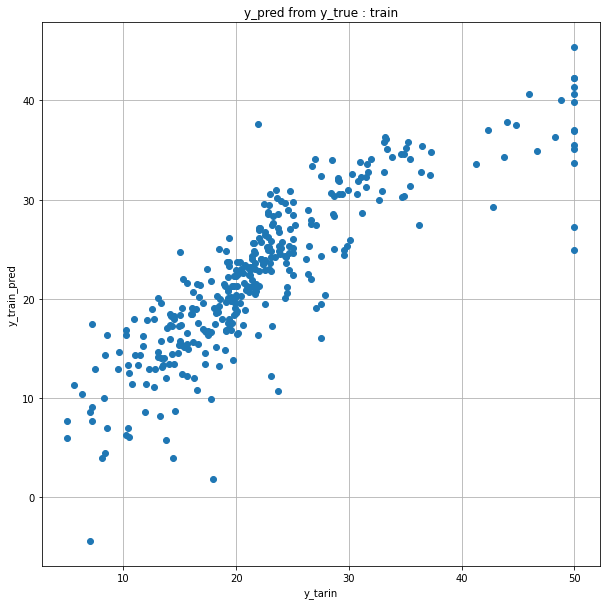

0.7295579805153971

In [181]:
y_train_pred = lr.predict(X_train)

plt.figure(figsize = (10,10))
plt.plot(y_train,y_train_pred,'o')
plt.grid()
plt.title('y_pred from y_true : train')
plt.xlabel('y_tarin')
plt.ylabel('y_train_pred')
plt.show()

r2_score(y_train,y_train_pred)

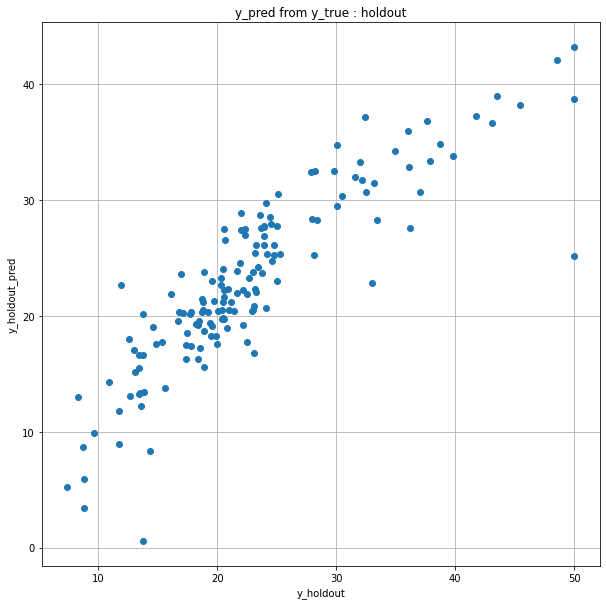

0.7620882852026815

In [182]:
y_holdout_pred = lr.predict(X_holdout)

plt.figure(figsize = (10,10))
plt.plot(y_holdout,y_holdout_pred,'o')
plt.grid()
plt.title('y_pred from y_true : holdout')
plt.xlabel('y_holdout')
plt.ylabel('y_holdout_pred')
plt.show()

r2_score(y_holdout,y_holdout_pred)

Классификация:

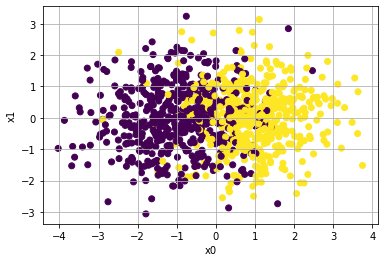

In [220]:
# 100 примеров, 2 информативных признака, 1 избыточных признакa, 2 класса и один кластер на класс

X, y = datasets.make_classification(n_samples = 1000, n_features=5, n_redundant=1, n_informative=2,random_state=1, n_clusters_per_class=2)

plt.scatter(X[:,2],X[:,1],c = y)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Генерация гаусовой смеси через sklearn.datasets.make_blobs позволяет строить похожие на реальные еэкземпляры датасетов. Не является в явной форме классификационным набором данных, но можно успешно использовать для генерации синтетических данных классификационных задач, т.к. возвращает и описание объектов и у-принадлежность источнику. Позволит построить сравнительно сложные для классификации задачи.  Для настройки использует следующие параметры:

  - n_samples=100, по умолчанию = 100
Количество образцов.
  - n_features=20, Общее количество признаков
  - centers=None,Количество гаусовых источников (центров нормальных распределений для генерации данных) 
  - cluster_std = 1.,характеристика рассеивания (стандартное отклонение) 
  - shuffle=True, Перемешаем объекты
  - random_state=None - зерно генератора случайных чисел

# LogisticRegression



Известная реализация метода ближайших соседей во фреймвоке SkiKit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

**class** class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) , 

где при инициализации определяем следующие параметры:

  - penalty='l2' - регуляризация,
  - С=1.,Обратная сила регуляризации; должен быть положительным числом с плавающей запятой.
  - solver='lbfgs' . Алгоритм для использования в задаче оптимизации. Значение по умолчанию — 'lbfgs'. Чтобы выбрать решатель, смотрим на данные:
      - Для небольших наборов данных хорошим выбором является «liblinear», тогда как «sag» и «saga» работают быстрее для больших;
      - Для многоклассовых задач только «newton-cg», «sag», «saga» и «lbfgs» обрабатывают полиномиальные потери;

      - «liblinear» ограничен схемами «один против остальных»


При работе в любой классификационной задаче необходимо выполнить следующие действия:

  1. прочитать (или создать) данные
  2. проверить их полноту и чистоту
  3. оценить размер данных и соотношение классов во множестве примеров (сбалансированные классы или нет)
  4. разделить выборку на тренировочную ( очень часто еще и на тренировочную и валидационную) и отложенную
  5. обработать примеры из тренировочной выборки, реализовать схему их обработки функционально или в рамках ООП и применить к (если есть, валидационным данным и) отложенной выборке 
  6. создать объект классификатор (или несколько классификаторов для сравнения моделей различной сложности)
  7. обучить объект классификатор (или несколько объектов классификаторов)
  8. выбрать метрику для оценки модели
  9. Оценить эффективность модели (или сравнить эффективность нескольких обученных моделей)
  10 применить модель к данным отложеной выборки и определить значения выбраной метрики
  11. Сделать вывод о качестве модели




In [221]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [222]:
data = load_iris()
X, y = data.data, data.target

In [223]:
X[0, :]

array([5.1, 3.5, 1.4, 0.2])

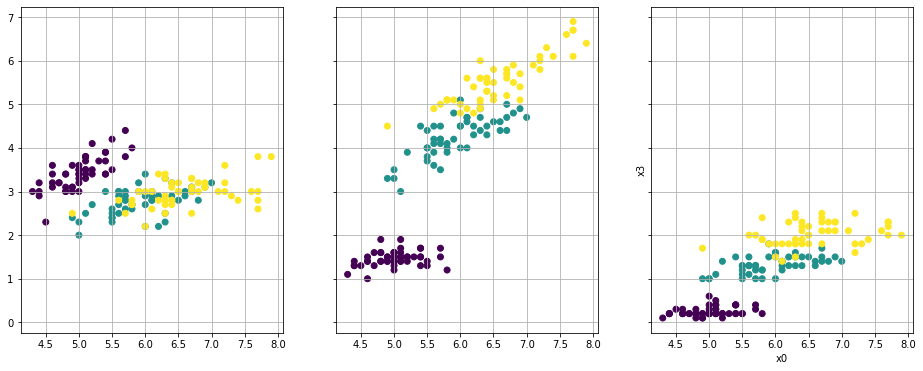

In [224]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
for i in range(1,4):
    axes[i-1].scatter(X[:, 0], X[:, i], c=y)
    axes[i-1].grid()
    
plt.xlabel('x0')
plt.ylabel('x'+str(i))
plt.show()

Посмотрим на соотношение классов в выборке, видим, что  поровну .

In [225]:
np.bincount(y)

array([50, 50, 50])

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [226]:
# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.3 - пропорция разбиения (доля тестов)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

Обучим  LogisticRegression.

In [228]:
lcl = LogisticRegression(multi_class = 'ovr')

In [232]:
%%time
lcl.fit(X_train, y_train)

CPU times: user 61.1 ms, sys: 2.64 ms, total: 63.8 ms
Wall time: 65.3 ms


LogisticRegression()

In [234]:

lcl_pred = lcl.predict(X_train)
accuracy_score(y_train, lcl_pred)

0.9809523809523809

Сделаем прогнозы для отложенной выборки. 

In [233]:

lcl_pred = lcl.predict(X_holdout)
accuracy_score(y_holdout, lcl_pred)

1.0

Вопросы для контроля:

  1. Можно ли обуществить формирование классификатора, который не ошибается
  2. Зачем нужно отложенная выборка
  3. как повлияет на результат теста увеличение C
  4. как повлияет на результат теста изменение решателя
  5. перечислите достоинства линейных моделей 
  6. каковы недостатки линейных моделей
 